# ICE7: Implementing New Diagnostic Metrics

## Evaluating Results from ACA2

### Part1: Replicating the Results

In [1]:
# Original code from ACA2

## Name the validation dataset 'original_va', and the training dataset 'original_tr'
import pandas as pd
original_va = pd.read_csv("Downloads/aca2_dataset_validation.csv")
original_tr = pd.read_csv("Downloads/aca2_dataset_training.csv")

## Clean data
## Turn the categorical variables ('SCHOOL', 'GRADE', 'Activity', 'ONTASK') into dummy variables across multiple columns
df_va = pd.get_dummies(original_va, columns = ['SCHOOL', 'GRADE', 'Activity', 'ONTASK'])
df_tr = pd.get_dummies(original_tr, columns = ['SCHOOL', 'GRADE', 'Activity', 'ONTASK'])

## Make the 'ONTASK' columns a single column contating the dependent boolean variable
df_va = df_va.rename(columns = {'ONTASK_Y': 'ONTASK'})
df_tr = df_tr.rename(columns = {'ONTASK_Y': 'ONTASK'})

## Turn 'NumACTIVITIES', 'NumFORMAT', and 'Obsv/act' to dummy variables for analysis
## All data points that is over the average of the entire variable will be called 1; 0 otherwis
df_va['NUMACTIVITIES_HIGH'] = (df_va['NumACTIVITIES'] > df_va['NumACTIVITIES'].mean()).astype(int)
df_tr['NUMACTIVITIES_HIGH'] = (df_tr['NumACTIVITIES'] > df_tr['NumACTIVITIES'].mean()).astype(int)
df_va['NUMFORMATS_HIGH'] = (df_va['NumFORMATS'] > df_va['NumFORMATS'].mean()).astype(int)
df_tr['NUMFORMATS_HIGH'] = (df_tr['NumFORMATS'] > df_tr['NumFORMATS'].mean()).astype(int)
df_va['OBSV/ACT_HIGH'] = (df_va['Obsv/act'] > df_va['Obsv/act'].mean()).astype(int)
df_tr['OBSV/ACT_HIGH'] = (df_tr['Obsv/act'] > df_tr['Obsv/act'].mean()).astype(int)

## Drop columns unnecessary for classification analysis
## turn all column names to lowercase
df_va = df_va.drop(['UNIQUEID',
                    'Class',
                    'STUDENTID',
                    'CODER',
                    'OBSNUM',
                    'ONTASK_N',
                    'totalobs-forsession',
                    'NumACTIVITIES',
                    'TRANSITIONS',
                    'NumFORMATS',
                    'FORMATchanges',
                    'Obsv/act',
                    'Transitions/Durations',
                    'Total Time'],
                   axis = 1)
df_tr = df_tr.drop(['UNIQUEID',
                    'Class',
                    'STUDENTID',
                    'CODER',
                    'OBSNUM',
                    'ONTASK_N',
                    'totalobs-forsession',
                    'NumACTIVITIES',
                    'TRANSITIONS',
                    'NumFORMATS',
                    'FORMATchanges',
                    'Obsv/act',
                    'Transitions/Durations',
                    'Total Time'],
                   axis = 1)
df_va.columns = df_va.columns.str.lower()
df_tr.columns = df_tr.columns.str.lower()

##Create functions to train and test decision tree model, which we used as the solution model for ACA2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

##Function to create a decision tree model given a list of the independent variable column names
y_tr = df_tr['ontask']
def new_dec_tree (x_cols):
    Xs_tr = df_tr[x_cols]
    dec_tree_model = DecisionTreeClassifier()
    dec_tree_model.fit(Xs_tr, y_tr)
    return dec_tree_model

##Function to test a logistic regression model
y_va = df_va['ontask']
def test_dec_tree(x_cols, model):
    Xs_va = df_va[x_cols]
    pred = model.predict(Xs_va)
    print(confusion_matrix(y_va, pred))
    print(f"Accuracy Score: {accuracy_score(y_va, pred)}")
    
##Put function together
def dec_tree_tester (x_cols):
    new_model = new_dec_tree(x_cols)
    test_dec_tree(x_cols, new_model)
    
##Model with highest accuraccy score upon testing
x_cols = [
'school_a',
'school_b',
'school_c',
'school_d',
'school_e',
'grade_0',
'grade_1',
'grade_2',
'grade_3',
'grade_4',
'activity_dancing',
'activity_smallgroup',
'activity_testing',
'activity_wholedesks',
'numactivities_high',
'obsv/act_high'
]
dec_tree_tester(x_cols)

[[ 174 1675]
 [ 132 3566]]
Accuracy Score: 0.6742383270236164


### Part2: Other Metrics from the Confusion Matrix

In [2]:
#Redefine the dec_tree_tester function so that it produces the
#precision, recall, accuracy, and f1 score of the model

## Import necessary packages
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Function to create a decision tree model given a list of the independent variable column names
# (y_tr = df_tr['ontask'])
def new_dec_tree (x_cols):
    Xs_tr = df_tr[x_cols]
    dec_tree_model = DecisionTreeClassifier()
    dec_tree_model.fit(Xs_tr, y_tr)
    return dec_tree_model

##Function to test a logistic regression model
# (y_va = df_va['ontask'])
def test_dec_tree_2(x_cols, model):
    Xs_va = df_va[x_cols]
    pred = model.predict(Xs_va)
    print(confusion_matrix(y_va, pred))
    print(f"Accuracy Score: {accuracy_score(y_va, pred)}")
    print(f"Precision Score: {precision_score(y_va, pred)}")
    print(f"Recall Score: {recall_score(y_va, pred)}")
    print(f"F1 Score: {f1_score(y_va, pred)}")
    
##Put function together
def dec_tree_tester_2 (x_cols):
    new_model = new_dec_tree(x_cols)
    test_dec_tree_2(x_cols, new_model)
    
## Implement new function
dec_tree_tester_2(x_cols)

[[ 174 1675]
 [ 132 3566]]
Accuracy Score: 0.6742383270236164
Precision Score: 0.6804045029574509
Recall Score: 0.9643050297458086
F1 Score: 0.7978521087369952


### Part3: Creating the ROC Curve, Precision-Recall Curve, and the AUC

AUC Score: 0.6137455060999455


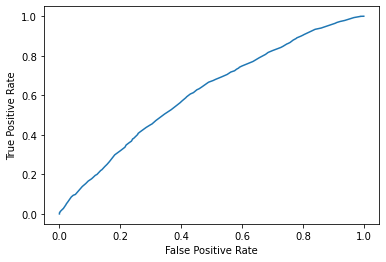

In [8]:
# Create an ROC plot and the corresponding AUC

## Import necessary pacakges
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

## Create function to calculate the AUC score and the ROC plot
## Function to create new model
# Recall that y_tr = df_tr['ontask']
def new_dec_tree (x_cols):
    Xs_tr = df_tr[x_cols]
    dec_tree_model = DecisionTreeClassifier()
    dec_tree_model.fit(Xs_tr, y_tr)
    return dec_tree_model

##Function to find the AUC score
# (y_va = df_va['ontask'])
def auc_roc (x_cols, model):
    Xs_va = df_va[x_cols]
    pred_proba = model.predict_proba(Xs_va)
    pred_proba_positive = pred_proba[:, 1]
    
    #Find AUC score
    auc = roc_auc_score(y_va, pred_proba_positive)
    print(f'AUC Score: {auc}')
    
    #Create ROC curve
    fpr, npr, _ = roc_curve(y_va, pred_proba_positive)
    pyplot.plot(fpr, npr)
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.show()
    
def auc_roc_generator (x_cols):
    new_model = new_dec_tree(x_cols)
    auc_roc(x_cols, new_model)

auc_roc_generator(x_cols)